# MSP Simulation Example - Dynamic Phasors
## Sample Circuit
<img src="VS_RL1.png" width="500" align="left">


$V_0$=$10 V$, $R$=$0.1 \Omega$, $L$=$1 mH$

## Run EMT simulation

In [1]:
import villas.dataprocessing.readtools as rt
import villas.dataprocessing.plottools as pt
from villas.dataprocessing.timeseries import TimeSeries as ts
import dpsim
import matplotlib.pyplot as plt

name = 'EMT_VS_RL1'
final_time = 0.1
time_step = 0.00001

# Nodes
gnd = dpsim.emt.Node.GND()
n1 =  dpsim.emt.Node('n1')
n2 =  dpsim.emt.Node('n2')

# Components
vs = dpsim.emt.ph1.VoltageSource('vs')
vs.V_ref = 0+10j
vs.f_src = 50
vs.connect([gnd, n1])

r1 = dpsim.emt.ph1.Resistor('r1')
r1.R = 0.1
r1.connect([n1, n2])

l1 = dpsim.emt.ph1.Inductor('l1')
l1.L = 0.001
l1.connect([n2, gnd])

system = dpsim.SystemTopology(50, [gnd, n1, n2], [vs, l1, r1])

logger = dpsim.Logger(name)
logger.log_attribute(r1, 'i_intf');

sim = dpsim.Simulation(name, system, timestep=time_step, duration=final_time, pbar=True, sim_type=1, log_level=4)
sim.add_logger(logger)

await sim.simulate()

work_dir='Logs/'
log_name_emt = 'EMT_VS_RL1'
ts_dpsim_emt = rt.read_timeseries_dpsim(work_dir + log_name_emt + '.csv')

HTML(value='Simulation start is pending...')

FloatProgress(value=0.0, max=0.1)

column number: 1
results length: 10001
real column names: ['r1.i_intf']
complex column names: []


## Show EMT inductor current

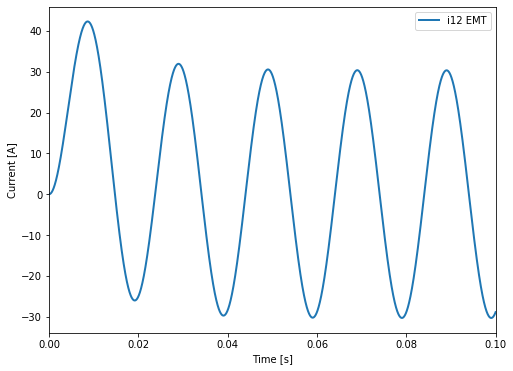

In [8]:
i12 = 'r1.i_intf'
plt.figure(figsize=(8,6))
plt.plot(ts_dpsim_emt[i12].time, ts_dpsim_emt[i12].values, label='i12 EMT', linewidth=2)
plt.xlabel('Time [s]')
plt.ylabel('Current [A]')
plt.xlim([0, final_time])
plt.legend()
plt.show()

## Run DP simulation

In [3]:
name = 'DP_VS_RL1'
final_time = 0.1
time_step = 0.001

# Nodes
gnd = dpsim.dp.Node.GND()
n1 =  dpsim.dp.Node('n1')
n2 =  dpsim.dp.Node('n2')

# Components
vs = dpsim.dp.ph1.VoltageSource('vs')
vs.V_ref = 0+10j
vs.connect([gnd, n1])

r1 = dpsim.dp.ph1.Resistor('r1')
r1.R = 0.1
r1.connect([n1, n2])

l1 = dpsim.dp.ph1.Inductor('l1')
l1.L = 0.001
l1.connect([n2, gnd])

system = dpsim.SystemTopology(50, [gnd, n1, n2], [vs, l1, r1])

logger = dpsim.Logger(name)
logger.log_attribute(r1, 'i_intf');

sim = dpsim.Simulation(name, system, timestep=time_step, duration=final_time, pbar=True)
sim.add_logger(logger)

await sim.simulate()

work_dir='logs/'
log_name_dp = 'DP_VS_RL1'
ts_dpsim_dp = rt.read_timeseries_dpsim(work_dir + log_name_dp + '.csv')

HTML(value='Simulation start is pending...')

FloatProgress(value=0.0, max=0.1)

column number: 1
results length: 100
real column names: []
complex column names: ['r1.i_intf']


## Comparison of EMT and DP results
### Calculation of amplitude of DP

In [4]:
ts_dpsim_dp_abs = ts_dpsim_dp[i12].abs()

### Comparison of EMT signal and amplitude of DP

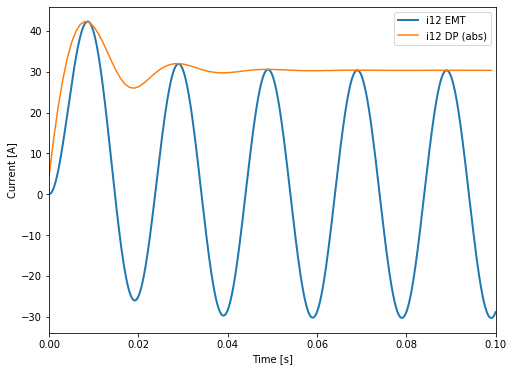

In [5]:
plt.figure(figsize=(8,6))
plt.plot(ts_dpsim_emt[i12].time, ts_dpsim_emt[i12].values, label='i12 EMT', linewidth=2)
plt.plot(ts_dpsim_dp_abs.time, ts_dpsim_dp_abs.values, label='i12 DP (abs)')
plt.xlabel('Time [s]')
plt.ylabel('Current [A]')
plt.xlim([0, final_time])
plt.legend()
plt.show()

### Calculation of backshift of DP

In [6]:
ts_dpsim_dp_emt = ts.frequency_shift_list(ts_dpsim_dp, 50)

### Comparison of original EMT signal and backshift of DP

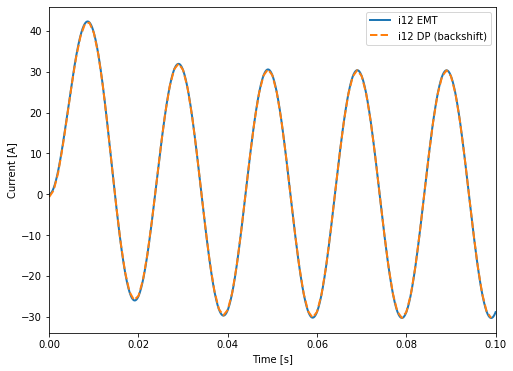

In [7]:
i12 = 'r1.i_intf'
plt.figure(figsize=(8,6))
plt.plot(ts_dpsim_emt[i12].time, ts_dpsim_emt[i12].values, label='i12 EMT', linewidth=2)
i12 = 'r1.i_intf_shift'
plt.plot(ts_dpsim_dp_emt[i12].time, ts_dpsim_dp_emt[i12].values,'--', label='i12 DP (backshift)', linewidth=2)
plt.xlabel('Time [s]')
plt.ylabel('Current [A]')
plt.xlim([0, final_time])
plt.legend()
plt.show()